In [81]:

import ipympl
import numpy as np
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from pyod.models.combination import aom, moa, average, maximization, median, majority_vote 
import scipy.io
#import matplotlib
#matplotlib.use('nbagg')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from pyod.utils.utility import standardizer
from keras.callbacks.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.python.keras.models import Model
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D
 

In [82]:
mat = scipy.io.loadmat('cardio.mat')
#mat = scipy.io.loadmat('satellite.mat')
#mat = scipy.io.loadmat('ionosphere.mat')


In [83]:
epochs = 100

In [84]:
Xtemp = mat['X']
ytemp = mat['y']
X = np.array(Xtemp)
y = np.array(ytemp)
print(X.shape)
y = y.reshape(X.shape[0],)
print(y.shape)

(1831, 21)
(1831,)


In [99]:
outliers = 0
clean_data = []
contam_data = []

for i in range(y.shape[0]):
    if(y[i]==1.0):
        outliers+=1;
        contam_data.append(X[i])
    else:
        clean_data.append(X[i])
      
        
print(outliers)
contam = outliers/y.shape[0]
print(contam)
clean_data = np.array(clean_data)
contam_data = np.array(contam_data)
print(clean_data.shape)
# test_data_full = []
# for i in range(176):
#     test_data_full.append(contam_data[i])
# one = np.ones(176)
# test_data_full = np.array(test_data_full)

# test_data_full= np.append(test_data_full,one,1)

# print(test_data_full.shape)

Xy = X.copy()
Xy.shape
Xy = np.array(Xy)
Xy = np.insert(Xy, 21, y, axis=1)
print(Xy.shape)
count = 176
count2 = 176
test_data =[]
for i in range(Xy.shape[0]):
    if(Xy[i,21]==1 and count>0):
        test_data.append(Xy[i])
        count = count-1
    elif(Xy[i,21]==0 and count2>0):
        test_data.append(Xy[i])
        count2 = count2-1
test_data = np.array(test_data)        
print(test_data.shape)
np.random.shuffle(test_data)
print(test_data.shape)
test_x = test_data[:,:21]
test_y = test_data[:,21]
print(test_x.shape)
print(test_y.shape)
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y)


176
0.0961223375204806
(1655, 21)
(1831, 22)
(352, 22)
(352, 22)
(352, 21)
(352,)


In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=20)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.40, random_state=6)
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.40, random_state=7)

In [87]:
x_test

array([[-1.26489213, -0.91998844, -0.20364049, ..., -2.59615948,
         0.64542359, -2.12660547],
       [-1.05325806,  3.03545491, -0.20364049, ..., -0.18230558,
        -0.52358808, -0.49329397],
       [-1.79397731,  0.40507275, -0.20364049, ..., -1.00991263,
        -0.49018775, -0.49329397],
       ...,
       [-0.20672176, -0.50271807, -0.20364049, ..., -0.18230558,
        -0.65718941, -0.49329397],
       [ 0.63981454,  2.26357434, -0.20364049, ...,  0.85220324,
        -0.28978574,  1.14001753],
       [ 1.3805338 ,  0.0085275 , -0.20364049, ...,  0.99013775,
        -0.62378908, -0.49329397]])

In [88]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x_train = StandardScaler().fit_transform(x_train)
x_train = pd.DataFrame(x_train)
x_test = StandardScaler().fit_transform(x_test)
x_test = pd.DataFrame(x_test)

x_train2 = pd.DataFrame(x_train2)
x_test2 = pd.DataFrame(x_test2)
x_train2 = StandardScaler().fit_transform(x_train2)
x_train2 = pd.DataFrame(x_train2)
x_test2 = StandardScaler().fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)

x_train3 = pd.DataFrame(x_train3)
x_test3 = pd.DataFrame(x_test3)
x_train3 = StandardScaler().fit_transform(x_train3)
x_train3 = pd.DataFrame(x_train3)
x_test3 = StandardScaler().fit_transform(x_test3)
x_test3 = pd.DataFrame(x_test3)



In [89]:
x_train_full = x_train.copy()
x_train_full['y']=y_train
x_train_full2 = x_train2.copy()
x_train_full2['y']=y_train2
x_train_full3 = x_train3.copy()
x_train_full3['y']=y_train3

In [90]:
x_test_full = x_test.copy()
x_test_full['y']=y_test
x_test_full2 = x_test2.copy()
x_test_full2['y']=y_test2
x_test_full3 = x_test3.copy()
x_test_full3['y']=y_test3
#sns.scatterplot(x=0, y=1, hue='y', data=x_test_full);

No handles with labels found to put in legend.


Text(0, 0.5, 'y')

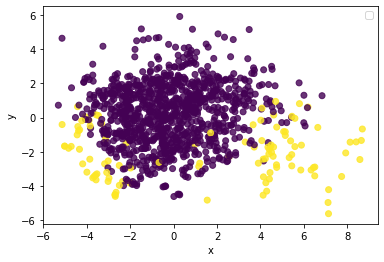

In [105]:

pca = PCA(2)
x_pca = pca.fit_transform(x_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']

# Plot
fig11, ax11 = plt.subplots()



ax11.scatter(x_pca['PC1'], x_pca['PC2'], c=y_train, alpha=0.8)
ax11.legend()
ax11.set_xlabel('x')
ax11.set_ylabel('y')


In [92]:
clf1 = AutoEncoder(hidden_neurons =[ 20, 10, 1,  10, 20]
                   ,contamination = contam
                   ,epochs=epochs
                  )

clf1.fit(clean_data)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 21)                462       
_________________________________________________________________
dropout_8 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 21)                462       
_________________________________________________________________
dropout_9 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 20)                440       
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

1489/1489 [==============================] - 0s 147us/step - loss: 2.0029 - val_loss: 1.7744
Epoch 56/100
1489/1489 [==============================] - 0s 144us/step - loss: 1.9852 - val_loss: 1.7574
Epoch 57/100
1489/1489 [==============================] - 0s 137us/step - loss: 1.9567 - val_loss: 1.7414
Epoch 58/100
1489/1489 [==============================] - 0s 146us/step - loss: 1.9218 - val_loss: 1.7244
Epoch 59/100
1489/1489 [==============================] - 0s 133us/step - loss: 1.8994 - val_loss: 1.7083
Epoch 60/100
1489/1489 [==============================] - 0s 139us/step - loss: 1.8797 - val_loss: 1.6934
Epoch 61/100
1489/1489 [==============================] - 0s 141us/step - loss: 1.8470 - val_loss: 1.6781
Epoch 62/100
1489/1489 [==============================] - 0s 135us/step - loss: 1.8277 - val_loss: 1.6639
Epoch 63/100
1489/1489 [==============================] - 0s 143us/step - loss: 1.7954 - val_loss: 1.6488
Epoch 64/100
1489/1489 [==============================] - 0

AutoEncoder(batch_size=32, contamination=0.0961223375204806, dropout_rate=0.2,
      epochs=100, hidden_activation='relu',
      hidden_neurons=[20, 10, 1, 10, 20], l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x00000230C3D93288>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

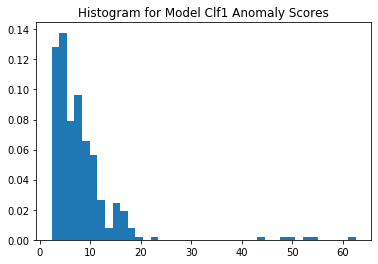

In [93]:

# Get the outlier scores for the train data
y_train_scores = clf1.decision_scores_  

# Predict the anomaly scores
y_train_pred = clf1.labels_
y_test_scores = clf1.decision_function(test_x)  # outlier scores
y_train_scores = clf1.decision_scores_  # raw outlier scores
#print(y_test_scores.shape)
y_test_scores = pd.Series(y_test_scores)
y_test_pred = clf1.predict(test_x)
 
# Plot it!
plt.close()
plt.hist(y_test_scores, bins='auto',density=True)  
plt.title("Histogram for Model Clf1 Anomaly Scores")

plt.show()

In [95]:
# evaluate and print the results
print("\nOn Training Data:")
#evaluate_print('clf_1', y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print('clf_1', test_y, y_test_scores)


On Training Data:

On Test Data:
clf_1 ROC:0.9281, precision @ rank n:0.8629


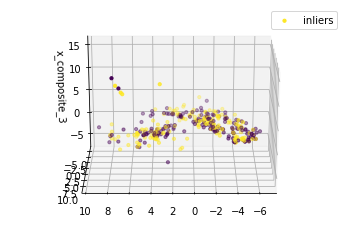

In [100]:
#%matplotlib notebook 
pca = PCA(3)
x_pca = pca.fit_transform(test_x)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2','PC3']

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.set_zlabel("x_composite_3")

ax3.scatter(x_pca['PC1'], x_pca['PC2'], zs=x_pca['PC3'], s=10, lw=1, label="inliers",c=y_test_pred)# Plot x's for the ground truth outliers
# ax.scatter(x_pca['PC1'],x_pca['PC2'], x_pca['PC3'],
#            lw=3, s=60, marker="x", c=y_test_scores3, label="outliers")
ax3.legend()
ax3.view_init(azim=90,elev=20)
plt.show()

In [101]:
df_test = test_x.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<6.3, 0, 1)
print(df_test['cluster'].value_counts())

df_test.groupby('cluster').mean()

1    183
0    169
Name: cluster, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.030584,-0.481959,0.373615,-0.444702,0.195821,0.156589,0.698031,0.441323,0.181382,0.539634,...,-0.233879,0.098914,0.148350,-0.024530,-0.518811,-0.502793,-0.515307,0.292645,-0.203357,4.292809
1,-0.071415,-0.351229,0.343711,-0.295358,0.114220,0.279847,0.892112,0.407813,0.218616,0.348163,...,-0.328670,0.088371,0.271105,0.082749,-0.698491,-0.618071,-0.593094,0.474042,-0.261239,11.741332


In [102]:
print("Test Data Counts")
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))
print("Predicted Data Counts")
unique, counts = np.unique(y_test_pred, return_counts=True)
print(dict(zip(unique, counts)))

Test Data Counts
{0.0: 663, 1.0: 70}
Predicted Data Counts
{0: 166, 1: 186}


In [17]:
clf2 = AutoEncoder(hidden_neurons =[20, 12, 6,  
                                    #2, 
                                    6,  12, 20]
                   ,contamination = contam
                   ,epochs=epochs
                  )
clf2.fit(x_train2)




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 21)                462       
_________________________________________________________________
dropout_8 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 21)                462       
_________________________________________________________________
dropout_9 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 20)                440       
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 12)               

AutoEncoder(batch_size=32, contamination=0.0961223375204806, dropout_rate=0.2,
      epochs=100, hidden_activation='relu',
      hidden_neurons=[20, 12, 6, 6, 12, 20], l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x00000191C6D931F8>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

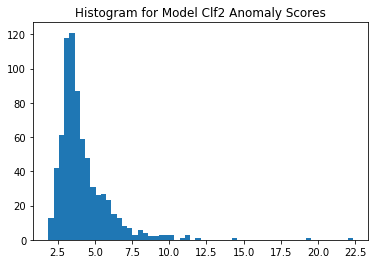

In [18]:

# Predict the anomaly scores
y_train_pred2 = clf2.labels_
y_test_scores2 = clf2.decision_function(x_test2)  

y_test_scores2 = pd.Series(y_test_scores2)
y_train_scores2 = clf2.decision_scores_  # raw outlier scores
y_test_pred2 = clf2.predict(x_test2)



plt.hist(y_test_scores2, bins='auto')  
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

In [19]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print('clf_2', y_train2, y_train_scores2)
print("\nOn Test Data:")
evaluate_print('clf_2', y_test2, y_test_scores2)


On Training Data:
clf_2 ROC:0.9533, precision @ rank n:0.6146

On Test Data:
clf_2 ROC:0.9505, precision @ rank n:0.625


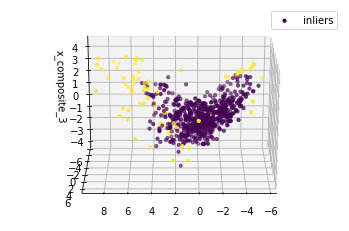

In [20]:
pca = PCA(3)
x_pca = pca.fit_transform(x_test2)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2','PC3']

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.set_zlabel("x_composite_3")

ax2.scatter(x_pca['PC1'], x_pca['PC2'], zs=x_pca['PC3'], s=10, lw=1, label="inliers",c=y_test_pred2)# Plot x's for the ground truth outliers
# ax.scatter(x_pca['PC1'],x_pca['PC2'], x_pca['PC3'],
#            lw=3, s=60, marker="x", c=y_test_scores3, label="outliers")
ax2.legend()
ax2.view_init(azim=90,elev=20)
plt.show()


In [21]:
df_test2 = x_test2.copy()
df_test2['score'] = y_test_scores2
df_test2['cluster'] = np.where(df_test2['score']<6.2, 0, 1)
print(df_test2['cluster'].value_counts())

df_test2.groupby('cluster').mean()

0    659
1     74
Name: cluster, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.001208,0.029581,-0.120187,0.027330,-0.086017,-0.052124,-0.152402,-0.058560,-0.104692,-0.064588,...,0.062407,-0.073902,-0.074347,-0.048316,0.105256,0.108778,0.089963,-0.154403,0.068545,3.755754
1,0.010759,-0.263427,1.070315,-0.243382,0.766013,0.464184,1.357201,0.521499,0.932321,0.575181,...,-0.555761,0.658126,0.662093,0.430276,-0.937345,-0.968712,-0.801153,1.375022,-0.610422,8.247934


In [22]:
print("Test Data Counts")
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))
print("Predicted Data Counts")
unique, counts = np.unique(y_test_pred2, return_counts=True)
print(dict(zip(unique, counts)))

Test Data Counts
{0.0: 663, 1.0: 70}
Predicted Data Counts
{0: 661, 1: 72}


In [23]:
# Step 1: Build the model
clf3 = AutoEncoder(hidden_neurons =[
  #  100, 50,
    25, 1, 25
  #  , 50, 100
]
                   ,contamination = contam
                   ,epochs=epochs
                  )
clf3.fit(x_train3)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 21)                462       
_________________________________________________________________
dropout_16 (Dropout)         (None, 21)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 21)                462       
_________________________________________________________________
dropout_17 (Dropout)         (None, 21)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 25)                550       
_________________________________________________________________
dropout_18 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                

Epoch 62/100
988/988 [==============================] - 0s 112us/step - loss: 2.8694 - val_loss: 2.4783
Epoch 63/100
988/988 [==============================] - 0s 111us/step - loss: 2.8048 - val_loss: 2.4505
Epoch 64/100
988/988 [==============================] - 0s 113us/step - loss: 2.7814 - val_loss: 2.4228
Epoch 65/100
988/988 [==============================] - 0s 107us/step - loss: 2.7448 - val_loss: 2.3962
Epoch 66/100
988/988 [==============================] - 0s 114us/step - loss: 2.7426 - val_loss: 2.3700
Epoch 67/100
988/988 [==============================] - 0s 113us/step - loss: 2.6675 - val_loss: 2.3448
Epoch 68/100
988/988 [==============================] - 0s 114us/step - loss: 2.6199 - val_loss: 2.3212
Epoch 69/100
988/988 [==============================] - 0s 110us/step - loss: 2.6182 - val_loss: 2.2969
Epoch 70/100
988/988 [==============================] - 0s 111us/step - loss: 2.5844 - val_loss: 2.2737
Epoch 71/100
988/988 [==============================] - 0s 104us

AutoEncoder(batch_size=32, contamination=0.0961223375204806, dropout_rate=0.2,
      epochs=100, hidden_activation='relu', hidden_neurons=[25, 1, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x00000191C6D931F8>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

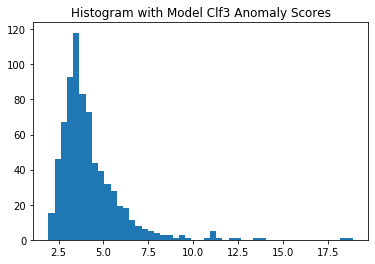

In [24]:

# Predict the anomaly scores
y_train_pred3 = clf3.labels_
y_test_scores3 = clf3.decision_function(x_test3)
#print(y_test_scores.shape)
y_test_scores3 = pd.Series(y_test_scores3)
y_train_scores3 = clf3.decision_scores_  # raw outlier scores
y_test_pred3 = clf3.predict(x_test3)


# Step 2: Determine the cut point
plt.hist(y_test_scores3, bins='auto')  
plt.title("Histogram with Model Clf3 Anomaly Scores")
plt.show()

In [25]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print('clf_3', y_train3, y_train_scores3)
print("\nOn Test Data:")
evaluate_print('clf_3', y_test3, y_test_scores3)


On Training Data:
clf_3 ROC:0.9506, precision @ rank n:0.6132

On Test Data:
clf_3 ROC:0.9568, precision @ rank n:0.6143


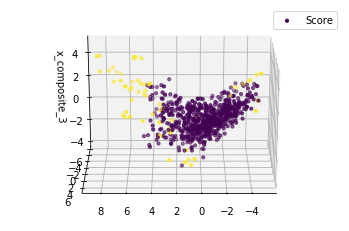

In [26]:

pca = PCA(3)
x_pca = pca.fit_transform(x_test3)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2','PC3']
plt.close()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

ax.scatter(x_pca['PC1'], x_pca['PC2'], zs=x_pca['PC3'], s=10, lw=1, label='Score',c=y_test_pred3)# Plot x's for the ground truth outliers
# ax.scatter(x_pca['PC1'],x_pca['PC2'], x_pca['PC3'],
#            lw=3, s=60, marker="x", c=y_test_scores3, label="outliers")
ax.legend()
ax.view_init(azim=90,elev=20)
plt.show()



In [27]:
print("Test Data Counts")
unique, counts = np.unique(y_test3, return_counts=True)
print(dict(zip(unique, counts)))
print("Predicted Data Counts")
unique, counts = np.unique(y_test_pred3, return_counts=True)
print(dict(zip(unique, counts)))

Test Data Counts
{0.0: 663, 1.0: 70}
Predicted Data Counts
{0: 671, 1: 62}


In [28]:
df_test3 = x_test3.copy()
df_test3['score'] = y_test_scores3
df_test3['cluster'] = np.where(df_test3['score']<6.2, 0, 1)
print(df_test3['cluster'].value_counts())

df_test3.groupby('cluster').mean()

0    665
1     68
Name: cluster, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.003358,0.024357,-0.104922,0.023620,-0.071538,-0.063649,-0.157200,-0.046368,-0.103294,-0.038683,...,0.066788,-0.067145,-0.069501,-0.059025,0.112334,0.102852,0.085149,-0.157673,0.053234,3.810795
1,-0.032839,-0.238200,1.026072,-0.230988,0.699596,0.622452,1.537325,0.453448,1.010154,0.378297,...,-0.653149,0.656637,0.679681,0.577225,-1.098560,-1.005837,-0.832702,1.541950,-0.520594,8.382885


In [29]:
# Put all the predictions in a data frame
from pyod.models.combination import aom, moa, average, maximization

# Put all the predictions in a data frame
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

test_scores  = pd.DataFrame({'clf1': clf1.decision_function(x_test),
                             'clf2': clf2.decision_function(x_test2),
                             'clf3': clf3.decision_function(x_test3) 
                            })
    

In [30]:
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

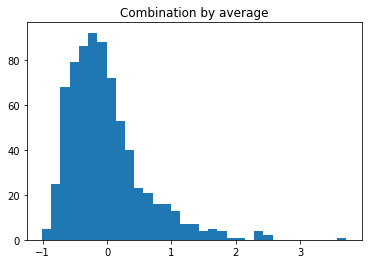

In [31]:
# Combination by average
y_by_average = average(test_scores_norm)
  

  
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [32]:


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# x, y = np.random.rand(2, 100) * 4

# hist, xedges, yedges = np.histogram2d(x_test[0], y_by_maximization, bins=10, range=[[-2, 2.5], [-2, 2.5]])

# # Construct arrays for the anchor positions of the 16 bars.
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0

# # Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.5 * np.ones_like(zpos)
# dz = hist.ravel()

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
# ax.view_init(azim=-220,elev=36)
# plt.show()

In [33]:
df_test = pd.DataFrame(x_test)
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<0.8, 0, 1)
print(df_test['y_by_average_cluster'].value_counts())



df_test.groupby('y_by_average_cluster').mean()

0    665
1     68
Name: y_by_average_cluster, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,y_by_average_score
y_by_average_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.028112,0.014998,-0.090477,0.002332,-0.063904,-0.073804,-0.075428,-0.012658,-0.057633,0.008713,...,0.047946,-0.022446,-0.026566,-0.036708,0.080858,0.077380,0.071200,-0.092545,0.046864,-0.152297
1,-0.274921,-0.146675,0.884814,-0.022801,0.624947,0.721757,0.737643,0.123783,0.563618,-0.085204,...,-0.468885,0.219509,0.259803,0.358981,-0.790748,-0.756727,-0.696297,0.905040,-0.458304,1.363212


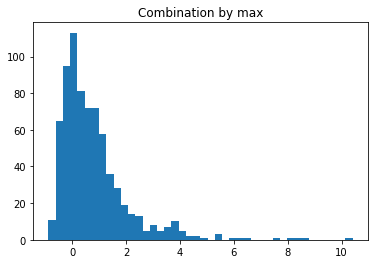

0    659
1     74
Name: y_by_maximization_cluster, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,y_by_average_score,y_by_average_cluster,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.013102,0.016413,-0.094999,0.006058,-0.044667,-0.073804,-0.105056,-0.018042,-0.037661,0.026880,...,-0.021988,-0.026645,0.089636,0.068923,0.068715,-0.102245,0.047162,-0.149489,0.022762,0.445374
1,-0.116678,-0.146168,0.846007,-0.053947,0.397775,0.657252,0.935570,0.160675,0.335384,-0.239381,...,0.195809,0.237283,-0.798242,-0.613789,-0.611932,0.910535,-0.420000,1.215324,0.716216,3.809164


In [34]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
             

plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

df_test = pd.DataFrame(x_test)
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<2.2, 0, 1)
print(df_test['y_by_maximization_cluster'].value_counts())

df_test.groupby('y_by_maximization_cluster').mean()

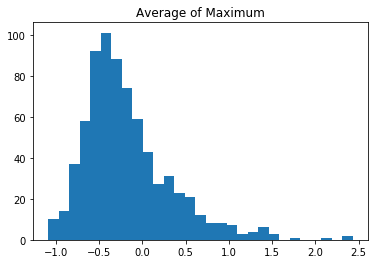

0    658
1     75
Name: y_by_aom_cluster, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,y_by_average_score,y_by_average_cluster,y_by_maximization_score,y_by_maximization_cluster,y_by_aom_score
y_by_aom_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.020035,0.008935,-0.040039,0.012426,-0.028602,0.008412,-0.063466,-0.02201,-0.051907,-0.025904,...,0.040432,0.050381,0.045842,-0.054247,0.043075,-0.122398,0.042553,0.630240,0.072948,-0.301961
1,-0.175770,-0.078393,0.351272,-0.109016,0.250934,-0.073804,0.556807,0.19310,0.455399,0.227266,...,-0.354725,-0.442011,-0.402188,0.475924,-0.377913,0.959445,0.533333,2.142419,0.346667,0.935365


In [35]:
# Combination by aom
y_by_aom = median(test_scores_norm)


plt.hist(y_by_aom, bins='auto')  # arguments are passed to np.histogram
plt.title("Average of Maximum")
plt.show()

df_test = pd.DataFrame(x_test)
df_test['y_by_aom_score'] = y_by_aom
df_test['y_by_aom_cluster'] = np.where(df_test['y_by_aom_score']<0.5, 0, 1)
print(df_test['y_by_aom_cluster'].value_counts())


df_test.groupby('y_by_aom_cluster').mean()

In [36]:
unique, counts = np.unique(y_test_pred, return_counts=True)
dict(zip(unique, counts))

{0: 663, 1: 70}

In [37]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0.0: 663, 1.0: 70}